### IMPORT LIBRARIES

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

### IMPORT DATA

In [4]:
df = pd.read_csv("pizza.csv")
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"Rp155,000",14.0,smoked beef,NaN,reguler,yes,no


### CHECK DATA

In [5]:
df.shape #mengecek jumlah baris dan kolom yang ada pada data

(136, 8)

In [6]:
df.info() #Informasi mengenai data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       136 non-null    object 
 1   price_rupiah  136 non-null    object 
 2   diameter      136 non-null    float64
 3   topping       135 non-null    object 
 4   variant       135 non-null    object 
 5   size          135 non-null    object 
 6   extra_sauce   131 non-null    object 
 7   extra_cheese  136 non-null    object 
dtypes: float64(1), object(7)
memory usage: 8.6+ KB


In [7]:
df.isnull().sum() #cek data yang mising

company         0
price_rupiah    0
diameter        0
topping         1
variant         1
size            1
extra_sauce     5
extra_cheese    0
dtype: int64

### CLEANING MISSING VALUE

In [8]:
df = df.dropna(subset=['topping', 'variant', 'size'], inplace=False)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 0 to 135
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       134 non-null    object 
 1   price_rupiah  134 non-null    object 
 2   diameter      134 non-null    float64
 3   topping       134 non-null    object 
 4   variant       134 non-null    object 
 5   size          134 non-null    object 
 6   extra_sauce   129 non-null    object 
 7   extra_cheese  134 non-null    object 
dtypes: float64(1), object(7)
memory usage: 9.4+ KB
None


### FILLING ANY MISSING VALUES

In [9]:
df[df.isna().any(axis=1)]

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
19,A,"Rp70,000",8.0,chicken,meat_lovers,reguler,NaN,yes
43,B,"Rp76,000",12.0,chicken,crunchy,medium,NaN,no
62,C,"Rp99,000",14.0,sausage,BBQ_sausage,large,NaN,yes
95,D,"Rp23,500",8.5,mozzarella,classic,small,NaN,no
135,E,"Rp78,000",12.0,meat,BBQ_meat_fiesta,medium,NaN,no


In [10]:
df.groupby('extra_sauce').count()

,company,price_rupiah,diameter,topping,variant,size,extra_cheese
extra_sauce,,,,,,,
no,53,53,53,53,53,53,53
yes,76,76,76,76,76,76,76


In [11]:
# mengisi missing value pada kolom "extra_sauce" dengan "yes" (karena muncul lebih sering berdasarkan cell sebelumnya)
df['extra_sauce']=df['extra_sauce'].fillna("yes")
df[df.isna().any(axis=1)]

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese


### CONVERT DATA TYPES

In [12]:
df['price_rupiah'].sample(5)

94      Rp23,500
112     Rp31,000
26     Rp149,000
107     Rp46,000
90     Rp188,000
Name: price_rupiah, dtype: object

In [13]:
#menghapus string & spesial karakter pada kolom price_rupiah & ubah object ke Int
df['price_rupiah'] = df['price_rupiah'].str.replace('Rp','')
df['price_rupiah'] = df['price_rupiah'].str.replace(',','')
df['price_rupiah'] = pd.to_numeric(df['price_rupiah'])

In [14]:
df['price_rupiah'].dtype # cek type data pada kolom "price_rupiah"

dtype('int64')

### CHECK UNIQUE VALUES

In [15]:
df['topping'].unique()

array(['chicken', 'papperoni', 'mushrooms', 'smoked beef', 'mozzarella',
       'black papper', 'tuna', 'meat', 'sausage', 'onion', 'vegetables',
       'beef'], dtype=object)

In [16]:
df['variant'].unique()

array(['double_signature', 'american_favorite', 'super_supreme',
       'meat_lovers', 'double_mix', 'classic', 'crunchy', 'new_york',
       'double_decker', 'spicy_tuna', 'BBQ_meat_fiesta', 'BBQ_sausage',
       'extravaganza', 'meat_eater', 'gournet_greek', 'italian_veggie',
       'thai_veggie', 'american_classic', 'neptune_tuna', 'spicy tuna'],
      dtype=object)

### EDA (EXPLANATORY DATA ANALYSIS)

In [17]:
df.describe()

,price_rupiah,diameter
count,134.000000,134.000000
mean,86485.074627,12.899254
std,44253.199209,3.265092
min,23500.000000,8.000000
25%,51750.000000,12.000000
50%,78000.000000,12.000000
75%,103500.000000,14.000000
max,248000.000000,22.000000


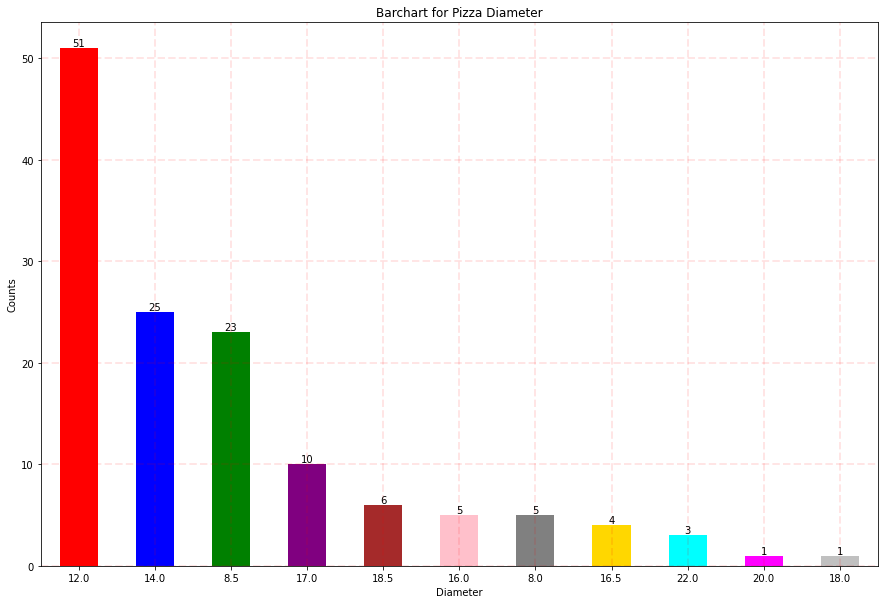

In [18]:
plt.figure(figsize=(15,10))
my_color='red','blue','green','purple','brown','pink','gray','gold','cyan','magenta','silver','seagreen'
ax=df['diameter'].value_counts().plot.bar(color=my_color, rot=0)
plt.xlabel('Diameter')
plt.ylabel('Counts')
plt.grid(color='red', alpha=0.1, linestyle='--',linewidth=2)
ax.bar_label(ax.containers[0])
plt.title("Barchart for Pizza Diameter")
plt.show()

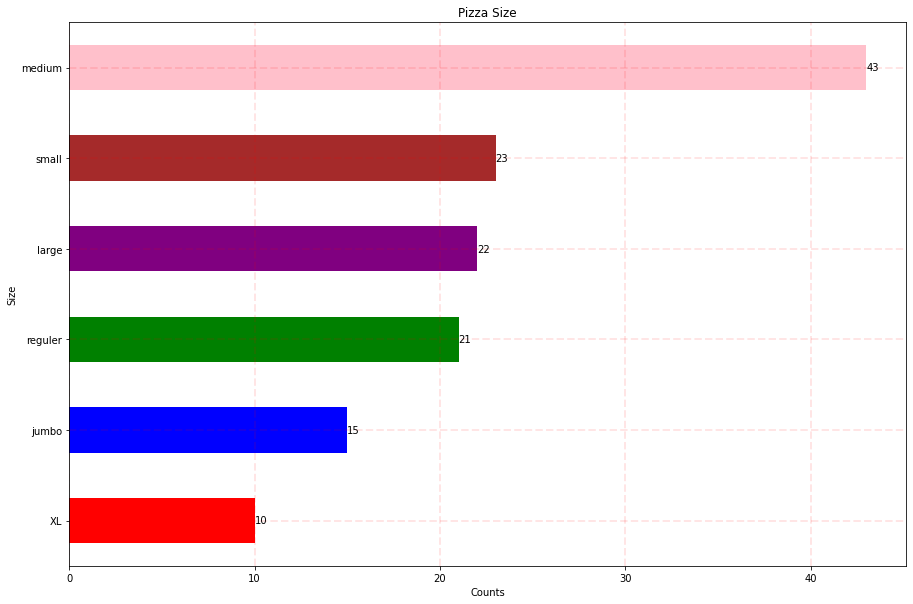

In [19]:
plt.figure(figsize=(15,10))
my_color='red','blue','green','purple','brown','pink','gray','gold','cyan','magenta','silver','seagreen'
ax2=df['size'].value_counts().sort_values().plot.barh(color=my_color)
plt.xlabel('Counts')
plt.ylabel('Size')
plt.grid(color='red', alpha=0.1, linestyle='--',linewidth=2)
ax2.bar_label(ax2.containers[0])
plt.title("Pizza Size")
plt.show()

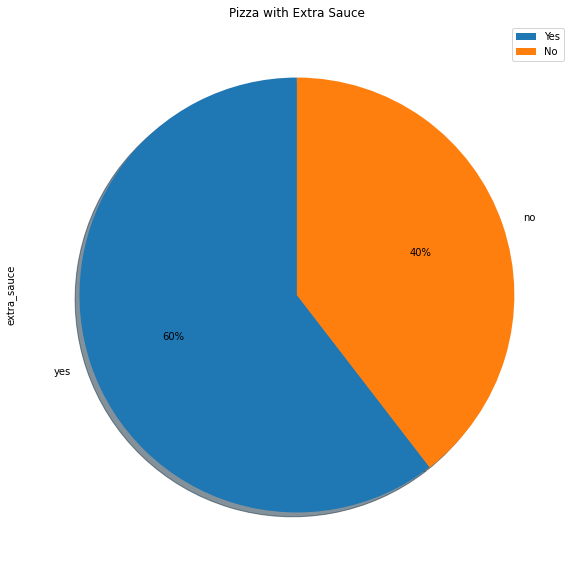

In [20]:
df['extra_sauce'].value_counts().plot(kind='pie', figsize=(15,10), autopct='%1.f%%', startangle=90, shadow=True)
plt.legend(['Yes', 'No'])
plt.title('Pizza with Extra Sauce')
plt.show()

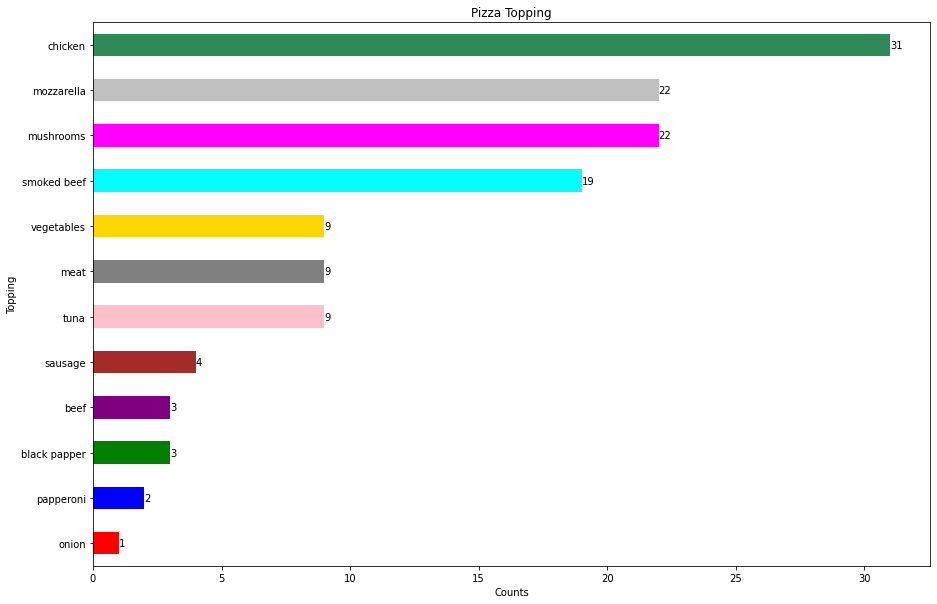

In [21]:
plt.figure(figsize=(15,10))
my_color='red','blue','green','purple','brown','pink','gray','gold','cyan','magenta','silver','seagreen'
ax2=df['topping'].value_counts().sort_values().plot(kind='barh',color=my_color)
plt.xlabel('Counts')
plt.ylabel('Topping')
ax2.bar_label(ax2.containers[0])
plt.title("Pizza Topping")
plt.show()

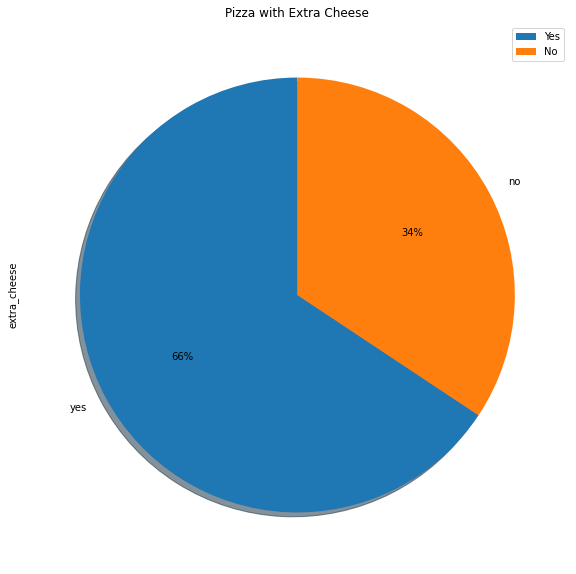

In [22]:
df['extra_cheese'].value_counts().plot(kind='pie', figsize=(15,10), autopct='%1.f%%', startangle=90, shadow=True)
plt.legend(['Yes', 'No'])
plt.title('Pizza with Extra Cheese')
plt.show()

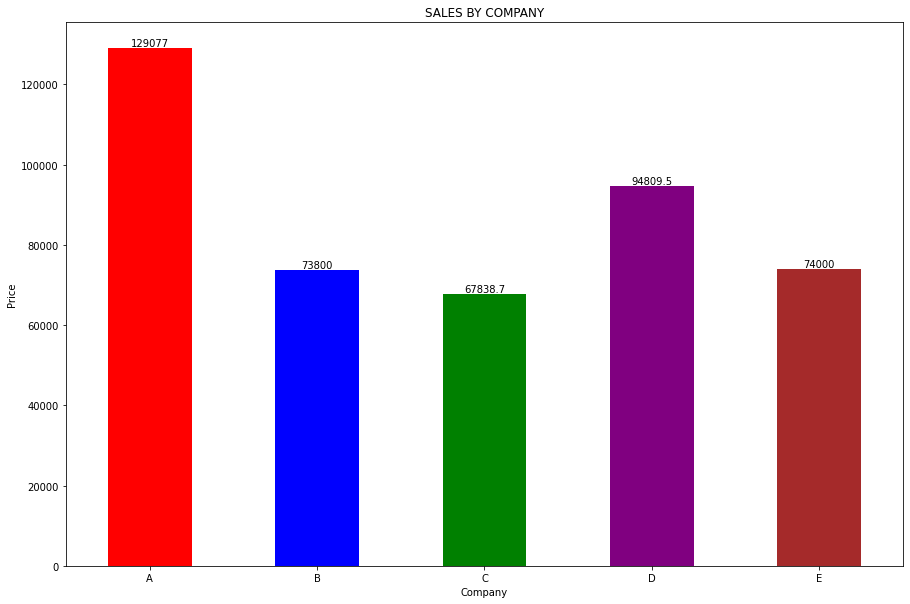

In [23]:
mean_price = df['price_rupiah'].groupby(df['company']).mean()
plt.figure(figsize=(15,10))
my_color='red','blue','green','purple','brown','pink','gray','gold','cyan','magenta','silver','seagreen'
ax3=mean_price.plot(kind='bar', color=my_color, rot=0)
plt.xlabel('Company')
plt.ylabel('Price')
ax3.bar_label(ax3.containers[0])
plt.title("SALES BY COMPANY")
plt.show()

### FEATURE ENGINERRING & HEATMAP

In [24]:
# Encode Label using Sklearn

EN=LabelEncoder()
df['company'] = EN.fit_transform(df['company']) # "A":1, "B":2, "C":3, "D":4, "E":5
df['topping'] = EN.fit_transform(df['topping']) # "chicken":1, "Mozzarella":2, dst
df['variant'] = EN.fit_transform(df['variant']) # 'double_signature':1, dst
df['size'] = EN.fit_transform(df['size']) # 'Regular':1, dst
df['extra_sauce'] = EN.fit_transform(df['extra_sauce'])
df['extra_cheese'] = EN.fit_transform(df['extra_cheese'])

df.sample(10)

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
110,4,83000,17.0,2,15,0,0,1
95,3,23500,8.5,4,4,5,1,0
133,4,44000,8.5,3,0,5,1,0
36,1,75000,12.0,5,5,3,0,1
97,3,72000,14.0,9,4,2,1,0
60,2,72000,12.0,8,1,3,1,1
61,2,99000,14.0,8,1,2,0,1
3,0,155000,14.0,9,8,4,1,0
56,2,44000,8.5,3,0,5,1,0
114,4,93000,14.0,5,4,2,0,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 0 to 135
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       134 non-null    int32  
 1   price_rupiah  134 non-null    int64  
 2   diameter      134 non-null    float64
 3   topping       134 non-null    int32  
 4   variant       134 non-null    int32  
 5   size          134 non-null    int32  
 6   extra_sauce   134 non-null    int32  
 7   extra_cheese  134 non-null    int32  
dtypes: float64(1), int32(6), int64(1)
memory usage: 6.3 KB


#### Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

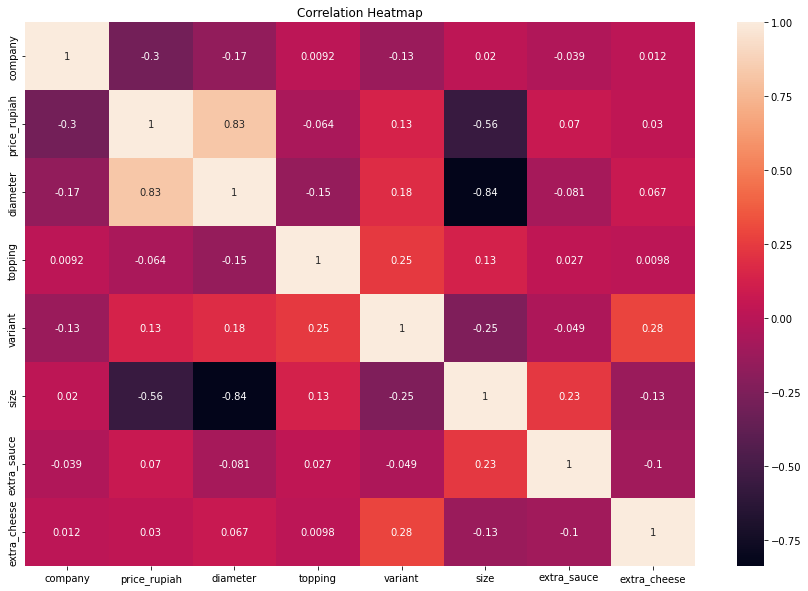

In [29]:
plt.figure(figsize=(15,10))
heatmap = sns.heatmap(df.corr(), annot=True)
heatmap.set_title('Correlation Heatmap')

#### SPLIT DATA

In [31]:
# split data untuk train dan test pada model
x=df.drop(columns=['price_rupiah'])
y=df['price_rupiah']

#### BUILDING MODEL

In [32]:
reg = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2)

In [33]:
reg=reg.fit(x_train, y_train) # fit the regression to training data

In [34]:
y_pred=reg.predict(x_test)
print(y_pred)

[ 36290.54310936 119716.7993358   80174.42737659 122867.52118573
  64666.48514606  70386.82120977  67487.9658054  158616.02980314
 164597.70902699  79945.6690411  109982.87396525 169467.36318202
  95367.42211674  81764.3357129   39141.10065696  39861.97391325
  43869.11547544  48287.59474909  71739.59736551 124220.6902699
  64743.85989109 156133.26704897  43599.41710054 214377.81322128
  94497.28416723 155840.46056398  72236.68366707]


#### Linear Regression Formula

In [36]:
coeff_df=pd.DataFrame(reg.coef_, x.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
company,-2821.480659
diameter,16056.111802
topping,695.664879
variant,237.132181
size,12391.911520
extra_sauce,4917.952012
extra_cheese,-1589.908336


In [45]:
df_test_set = x_test
df_test_set = df_test_set.join(y_test)
df_test_set['PREDICTED_PRICE']=y_pred
df_test_set.sample(5)

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,price_rupiah,PREDICTED_PRICE
32,1,12.0,2,6,3,0,1,96000,70386.821210
0,0,22.0,2,8,1,1,1,235000,214377.813221
46,1,8.5,9,4,5,1,1,75000,48287.594749
12,0,16.0,1,18,1,1,1,110000,119716.799336
26,0,16.5,2,7,4,1,0,149000,164597.709027


Text(0, 0.5, 'Predicted Price')

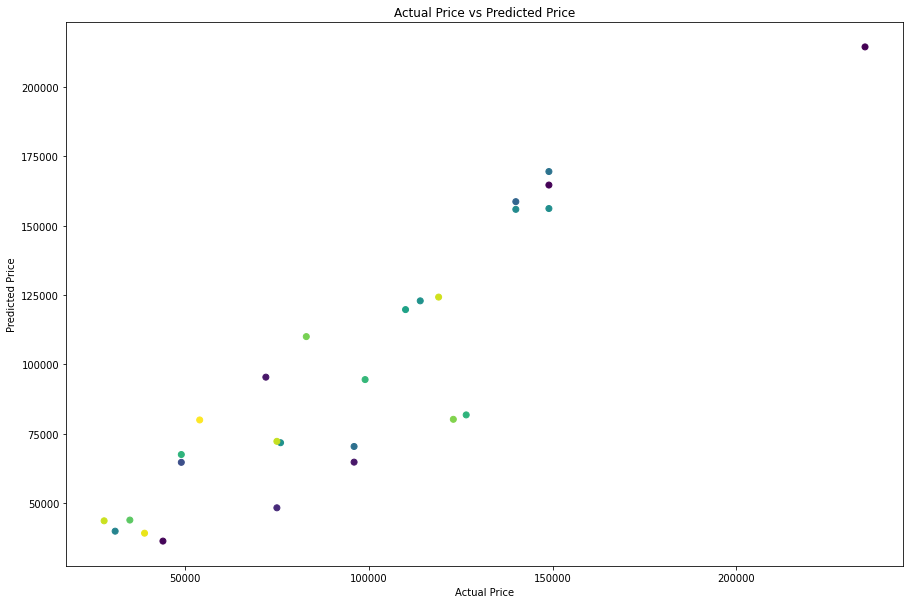

In [52]:
plt.figure(figsize=(15,10))
colors=np.random.rand(27)
plt.scatter(df_test_set['price_rupiah'], df_test_set['PREDICTED_PRICE'], c=colors)
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

In [55]:
output = pd.DataFrame({'Actual Price': y_test, 'Predicted Price':y_pred})
output = output.sort_values(by = 'Actual Price')
output.sample(10)

,Actual Price,Predicted Price
26,149000,164597.709027
101,31000,39861.973913
59,39000,39141.100657
72,28000,43599.417101
24,114000,122867.521186
0,235000,214377.813221
12,110000,119716.799336
46,75000,48287.594749
98,49000,67487.965805
44,119000,124220.690270


In [56]:
print("Training Model :", reg.score(x_train, y_train))
print("Testing Model :", reg.score(x_test, y_test))

Training Model : 0.7391101120679732
Testing Model : 0.8171322672617529


In [57]:
from sklearn import metrics
print("R2 Score :",metrics.r2_score(y_test, y_pred))

R2 Score : 0.8171322672617529


In [58]:
output.to_csv("Price Prediction with Linear Regression.csv", index=False)